In [69]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Shape of the image: (11222,)


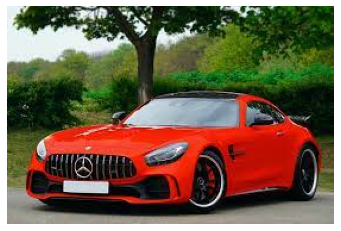

Shape of the image: (7720,)


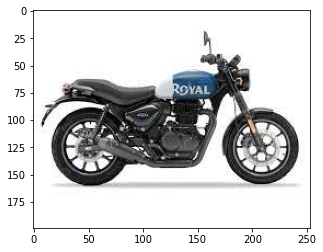

In [70]:
url_car = 'https://github.com/itsyanis/Convolutional-neural-network/blob/main/dataset/car/1696165135811.jpeg?raw=true'
url_motorcycle = 'https://github.com/itsyanis/Convolutional-neural-network/blob/main/dataset/motorcycle/1696165209042.jpeg?raw=true'

response_car = requests.get(url_car)
response_motorcycle = requests.get(url_motorcycle)

if response_car.status_code == 200 and response_motorcycle.status_code:
    
    image_array_car = np.asarray(bytearray(response_car.content), dtype="uint8")
    image_array_motorcycle = np.asarray(bytearray(response_motorcycle.content), dtype="uint8")

    image_car = cv2.imdecode(image_array_car, cv2.IMREAD_COLOR)
    image_motorcycle = cv2.imdecode(image_array_motorcycle, cv2.IMREAD_COLOR)
    plt.axis('off')

    plt.imshow(cv2.cvtColor(image_car, cv2.COLOR_BGR2RGB))
    plt.show()
    
    plt.imshow(cv2.cvtColor(image_motorcycle, cv2.COLOR_BGR2RGB))
    plt.show()
else:
    print("Erreur lors du téléchargement de l'image depuis GitHub.")


In [71]:
import pathlib

data_dir = 'C:\\Users\\yanis\\Projects\\AI\\Convolutional-neural-network\\dataset'
data_dir = pathlib.Path(data_dir)

In [57]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

153


In [72]:
batch_size = 3
image_height = 200
image_width = 200

In [73]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(image_height, image_width),
  batch_size=batch_size,
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(image_height, image_width),
  batch_size=batch_size,
)


Found 153 files belonging to 2 classes.
Using 123 files for training.
Found 153 files belonging to 2 classes.
Using 30 files for validation.


In [74]:
class_names = val_data.class_names
print("Class : ", class_names)

Class :  ['car', 'motorcycle']


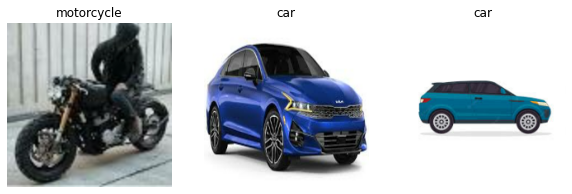

In [76]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(3):
        ax = plt.subplot(1, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
     

In [77]:
num_classes = 2

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(128,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


In [78]:
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],)

In [79]:
logdir="logs"

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1, write_images=logdir,
                                                   embeddings_data=train_data)

model.fit( 
    train_data,
  validation_data=val_data,
  epochs=2,
  callbacks=[tensorboard_callback]
)

Epoch 1/2
41/41 [==============================] - 11s 245ms/step - loss: 0.6868 - accuracy: 0.5447 - val_loss: 0.6711 - val_accuracy: 0.5667
Epoch 2/2
41/41 [==============================] - 10s 247ms/step - loss: 0.5487 - accuracy: 0.7154 - val_loss: 0.6397 - val_accuracy: 0.7333


In [80]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 197, 197, 128)     6272      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 98, 98, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 95, 95, 64)        131136    
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 47, 47, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 44, 44, 32)       

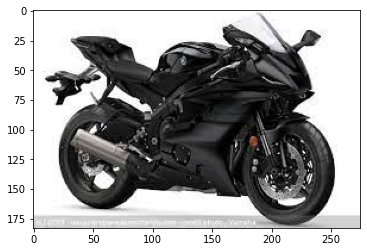

1/1 [==============================] - 0s 35ms/step
[[0.04304627 0.95695376]]
IT'S A MOTORCYCLE !


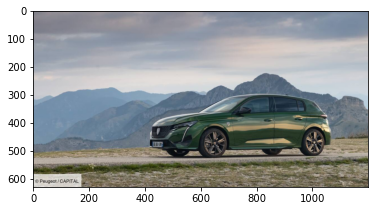

1/1 [==============================] - 0s 41ms/step
[[0.6486837  0.35131627]]
IT'S A CAR !


In [85]:
def predict_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    
    # Redimensionnement
    img_to_predict = np.expand_dims(cv2.resize(image, (200, 200)), axis=0)
    
    # Prédiction
    res = model.predict(img_to_predict)
    
    print(res)

    threshold = 0.5  # Seuil de probabilité
    if res[0][0] > threshold:
        print("IT'S A CAR !")
    elif res[0][1] > threshold:
        print("IT'S A MOTORCYCLE !")
    else:
        print("Class not recognized.")


image1_to_predict = cv2.imread('C:\\Users\\yanis\\Projects\\AI\\Convolutional-neural-network\\last_test_img\\motorcycle_test.jpg', cv2.IMREAD_COLOR)
image2_to_predict = cv2.imread('C:\\Users\\yanis\\Projects\\AI\\Convolutional-neural-network\\last_test_img\\car_test.png', cv2.IMREAD_COLOR)

predict_image(image1_to_predict)
predict_image(image2_to_predict)